# An Introduction to Investing in Prosper Loans
## by Jennifer Romana

## Investigation Overview

Prosper loans is a peer-to-peer lending marketplace, which connects borrowers with investors who can choose to fund their loans.

This presentation is directed towards the prospective investor and investigates potential returns and risks in investing in Prosper unsecured loans.  

Additionally the investigation will uncover some insights regarding patterns in “good” performing loans vs “bad” non-performing loans and how dependable the in-house Prosper Ratings are in determining risk and in formulating investment strategies.

## Dataset Overview

Since relaunching in 2009, Prosper has changed its business model and introduced a new proprietary Prosper Rating system.  In order to focus the analysis on the current model, the dataset excludes pre-July 2009 data.

There are 84,984 Prosper Loans in this dataset with 81 variables each. The variables include:

- data about the loan, from the basics such as amount, term, origination date to more in depth such as service fees and principal losses ,
- data about the borrower, including credit rating (Agency and in-house), location, occupation and income
- some information about investor such as Lender Yield and Number of investors

Furthermore, the dataset explores loans from mid-2009 to 2014

In [154]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [155]:
# base colours for charts
base_colour = sb.color_palette()[0]
base_palette='Blues'

# Title and axis format for charts
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

# Title and axis format for SEABORN charts
title_font_sb = {'fontname':'Arial', 'size':'24', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font_sb = {'fontname':'Arial', 'size':'18'}

#Prosper Rating x-ticks
PRating_xlocs= [0, 1, 2, 3, 4, 5, 6]
PRating_Risk = ['HR\nHigh Risk','E','D','C\nMid Risk','B','A','AA\nLow Risk']

In [156]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('data/prosperLoanData.csv')

In [157]:
#Change data type for time variables

loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])

loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

# Convert 'ProsperRating (Alpha)' to ordered variable
# Ordered lowest risk to highest to highet risk 

PRating = ['HR','E','D','C','B','A','AA']

ordered_PRating = pd.api.types.CategoricalDtype(ordered=True, categories=PRating)

loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(ordered_PRating)

#Convert 'IncomeRange' to ordered variable

IncRange=['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',

          '$75,000-99,999','$100,000+']

ordered_IncRange = pd.api.types.CategoricalDtype(ordered=True, categories=IncRange)

loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(ordered_IncRange)

# Convert 'LoanStatus' to ordered variable
LStat = ['Cancelled','Completed', 'Current', 'FinalPaymentInProgress',
         'Chargedoff','Defaulted',
         'Past Due (1-15 days)', 'Past Due (16-30 days)',
         'Past Due (31-60 days)','Past Due (61-90 days)',
         'Past Due (91-120 days)','Past Due (>120 days)']

ordered_LStat = pd.api.types.CategoricalDtype(ordered=True, categories=LStat)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_LStat)

In [158]:
loans_post2009 = loan_df[loan_df['LoanOriginationDate']>('2009-06-30')].sort_values('LoanOriginationDate')
loans_pre2009 = loan_df[loan_df['LoanOriginationDate']<('2009-07-01')].sort_values('LoanOriginationDate')

## Growing marketplace
Prosper Loans has experienced rapid growth since 2013, following a relatively steady rise since 2009. 

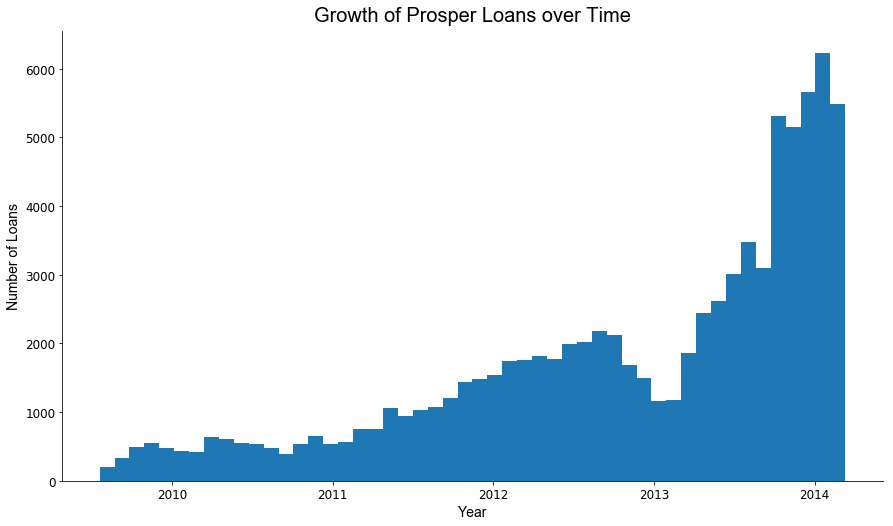

In [159]:
# Frequency of number of loans over time
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=loans_post2009, x='LoanOriginationDate', bins=50)
plt.xlabel('Year', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.tick_params(axis='both', labelsize=12)
plt.title('Growth of Prosper Loans over Time', fontdict=title_font)
sb.despine();

## Investment Options

**Investment Amount**

Investment opportunities are for loans, according to the website, of \\$2k to \$40k.  

While it makes sense that there are spikes at \\$5k marks (eg \$10k, 
\\$15k, \$20k, \\$25k) due to the tendency to round to a "nice" number, the bulk of loans are \\$4k, suggesting there might be a significant step in lending criteria should a borrower wish to borrow more than \\$4k.

There are no loans greater than \\$35k in this dataset, with the number of loans dropping off to negligible after \$25k.

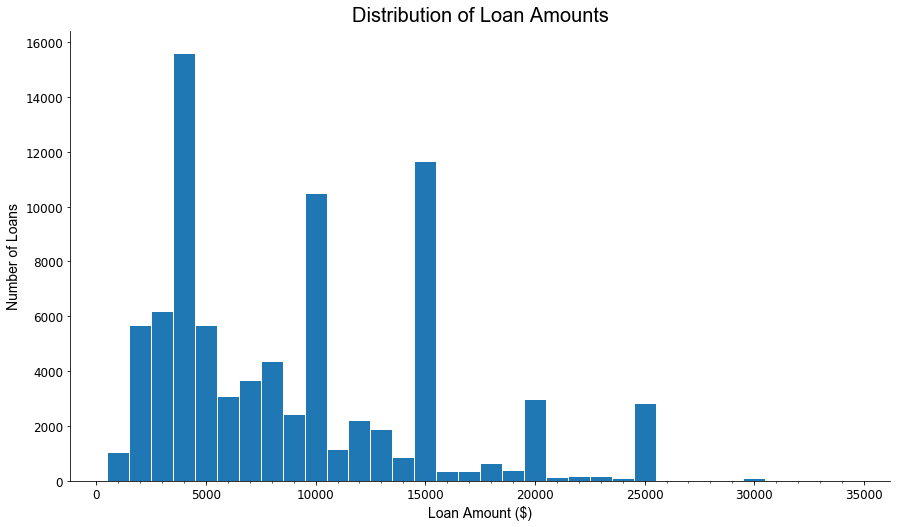

In [160]:
# Amount borrowed
fig, ax=plt.subplots(figsize=[14.70, 8.27])
bin_edges=np.arange(500,loans_post2009['LoanOriginalAmount'].max()+500,1000)
major_ticks=np.arange(0,loans_post2009['LoanOriginalAmount'].max()+1000,5000)
minor_ticks=np.arange(0,loans_post2009['LoanOriginalAmount'].max()+1000,1000)
plt.hist(data=loans_post2009, x='LoanOriginalAmount', bins=bin_edges, edgecolor='white')
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Loan Amount ($)', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Distribution of Loan Amounts', fontdict=title_font)
sb.despine();

### Investment Options

**Investment Term**

Investment in Prosper Loans is for a fixed term with no secondary market to sell the loan.  Most loans are for 3 years, followed by 5, then 1 year.  

Loan term is of interest as there is a risk that the investor may miss another investment opportunity since the funds are tied up for a fixed term, plus the window for possible default increases with term length of loan.

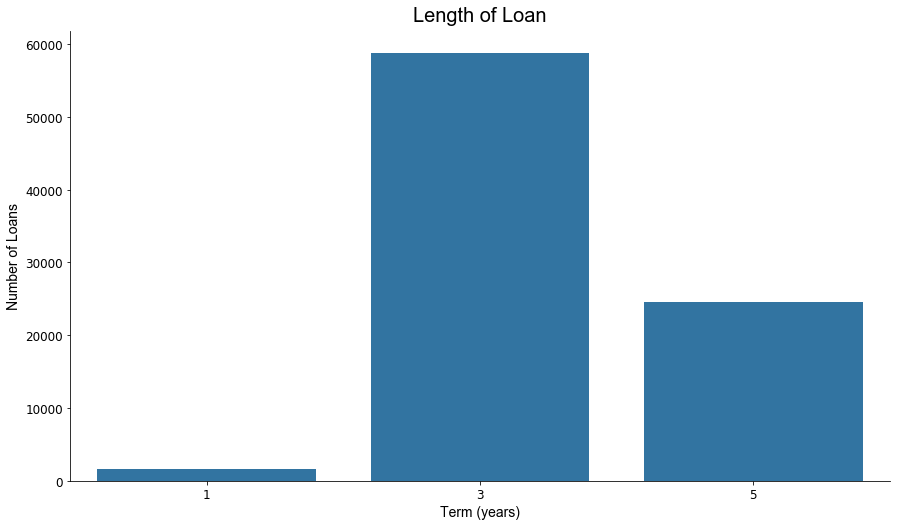

In [161]:
#Term
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=loans_post2009, x='Term', color=base_colour)
plt.xticks(ticks=[0,1,2], labels=['1','3','5'])
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Term (years)',fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Length of Loan', fontdict=title_font)
sb.despine();

## Potential Returns

Returns on investment, as measured by Lender Yield have been in the range 3-34%, centred around a mean of 18%, and with a spike in returns at 31%.  

Nothing comes for free - Returns are compensation for taking risk.  The following section will explore the risks involved in investing in Prosper Loans 

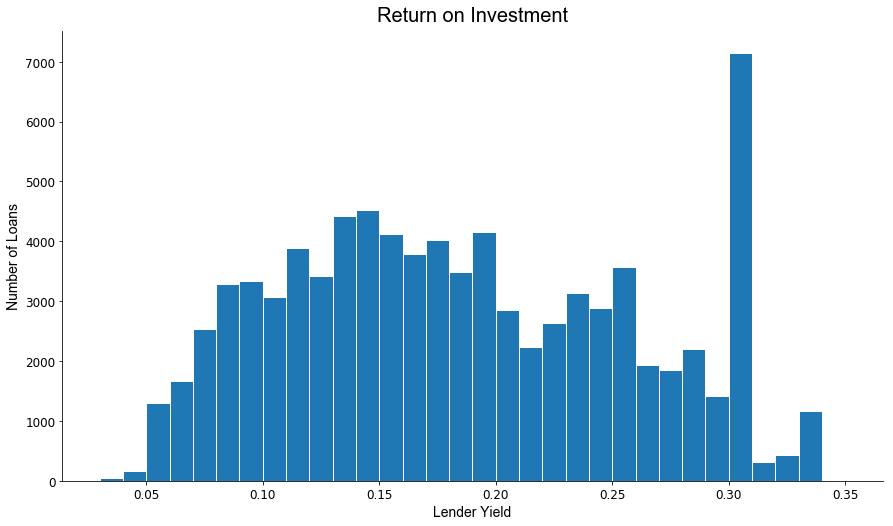

In [162]:
# Lender Yield
plt.figure(figsize=[14.70, 8.27])
bin_edges = np.arange(0.03,loans_post2009['LenderYield'].max()+0.01, 0.01)

plt.hist(data=loans_post2009, x='LenderYield', bins=bin_edges, edgecolor='white')
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Lender Yield',fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.title('Return on Investment', fontdict=title_font)
sb.despine();

## Potential Risks
The risk of investing in Prosper Loans is the possibility that the initial investment will be lost and the loan will become non-performing

According to the 2019 Prosper Prospectus:
> *If payments on the Borrower Loan corresponding to an investor's Note become more than 30 days overdue, such investor will be unlikely to receive the full principal and interest payments that were expected on the Note, and such investor may not recover the original purchase price on the Note.*

Just under 8% of loans were non-performing, that is the investment was lost due to Chargeoff or Default, or the payment is greater than 30 days past due and likely to become Chargeoff.

In [163]:
# New Variable NonPerfLoan so map the non- and performing loans
non_perf_loans=['Chargedoff','Defaulted','Past Due \(31-60 days\)','Past Due \(61-90 days\)'
                'Past Due \(91-120 days\)','Past Due \(>120 days\)']     

for nonp_loan in non_perf_loans:
    loans_post2009.loc[loans_post2009['LoanStatus'].str.contains(nonp_loan), 'NonPerfLoan']=True

loans_post2009.loc[loans_post2009['NonPerfLoan'].isnull(),'NonPerfLoan']=False

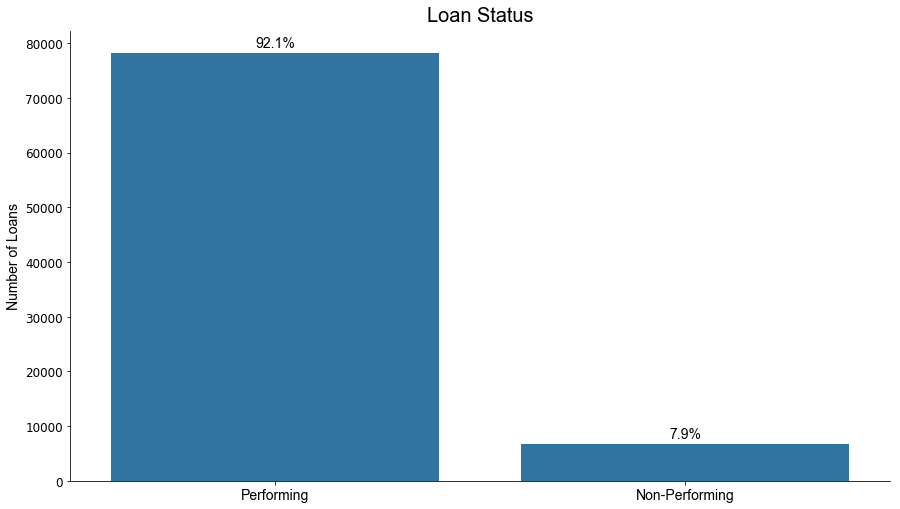

In [164]:
loan_counts= loans_post2009['NonPerfLoan'].value_counts()
n_loans=loans_post2009.shape[0]

plt.figure(figsize=[14.70, 8.27])
ax=sb.countplot(data=loans_post2009, x='NonPerfLoan', order=loan_counts.index,
                color=base_colour )
plt.title('Loan Status', fontdict=title_font)
sb.despine();

#add annotation
for i in range(loan_counts.shape[0]):
    count = loan_counts[i]
    pct_string='{:0.1f}%'.format(100*count/n_loans)
    # first argumentis x-position, just after the bar, 2nd argument y position
    # 3rd arg: string to be printed, the percentage
    # 4th arg: optional to center vertical alignment
    plt.text(i, count+1000, pct_string,ha='center', fontdict=axis_font)
    
ax.set_xticklabels(['Performing','Non-Performing'], fontdict=axis_font)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel('')
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.tight_layout;

## Potential Losses
Given the risk of non-performing loans, the historical distribution of losses on those non-performing loans show: 

- Net Principal Loss cuts out at \\$25k, even though loans can be up to \$35k.  There is an even more noteworthy dropoff in Losses at \\$15k.  

- The cutoff at \\$25k is likely due to the low number of datapoints as loans significantly drop off after \$25k   

- However the drop off at \\$15k does not coincide with a simlar decline in number of loans and suggests that the larger loans are not as frequently non-performing as the smaller loans and have at least some repayments and/or recovery should they become charged off


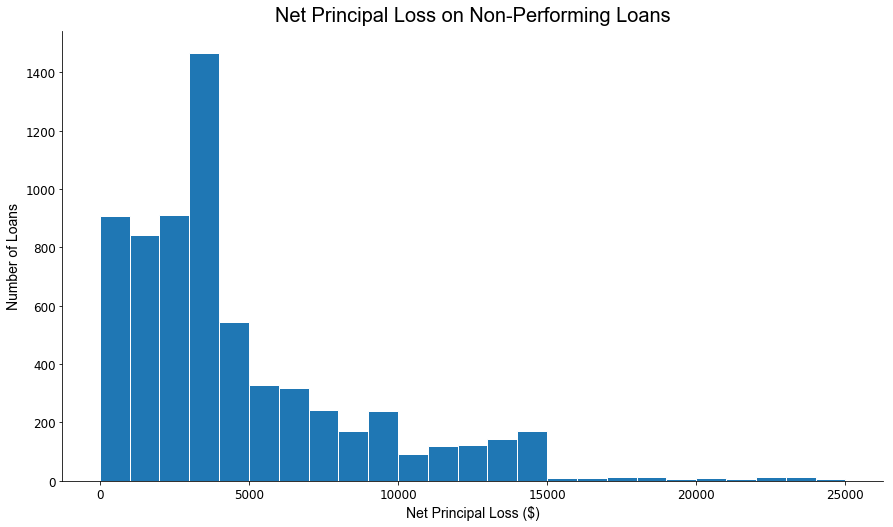

In [165]:
plt.figure(figsize=[14.70, 8.27])
bin_edges=np.arange(0,loans_post2009['LP_NetPrincipalLoss'].max()+1000,1000)
plt.hist(loans_post2009.loc[loans_post2009['NonPerfLoan']==True, 'LP_NetPrincipalLoss'], 
         bins=bin_edges, edgecolor='white')
plt.xlabel('Net Principal Loss ($)', fontdict=axis_font)
plt.ylabel('Number of Loans', fontdict=axis_font)
plt.tick_params(axis='both', labelsize=12)
plt.title('Net Principal Loss on Non-Performing Loans', fontdict=title_font)
sb.despine();

## How can we measure risk?
The risk of a loan going bad is a function of the creditworthiness of the underlying borrower and the ability to pay off the loan.

It can be measured by
- Credit Agency Scores
- Number of Credit Inquiries in the last 6 months
- Debt-to-Income Ratio
- Income


### How can we measure risk?

**Credit agency scores** can be useful in assessing a borrower's risk and indeed loans with lower Credit Scores below 650 are shown to have a higher proportion of non-performance.

In [166]:
loans_post2009['CreditScoreMean'] = (loans_post2009['CreditScoreRangeLower'] + loans_post2009['CreditScoreRangeUpper'])/2

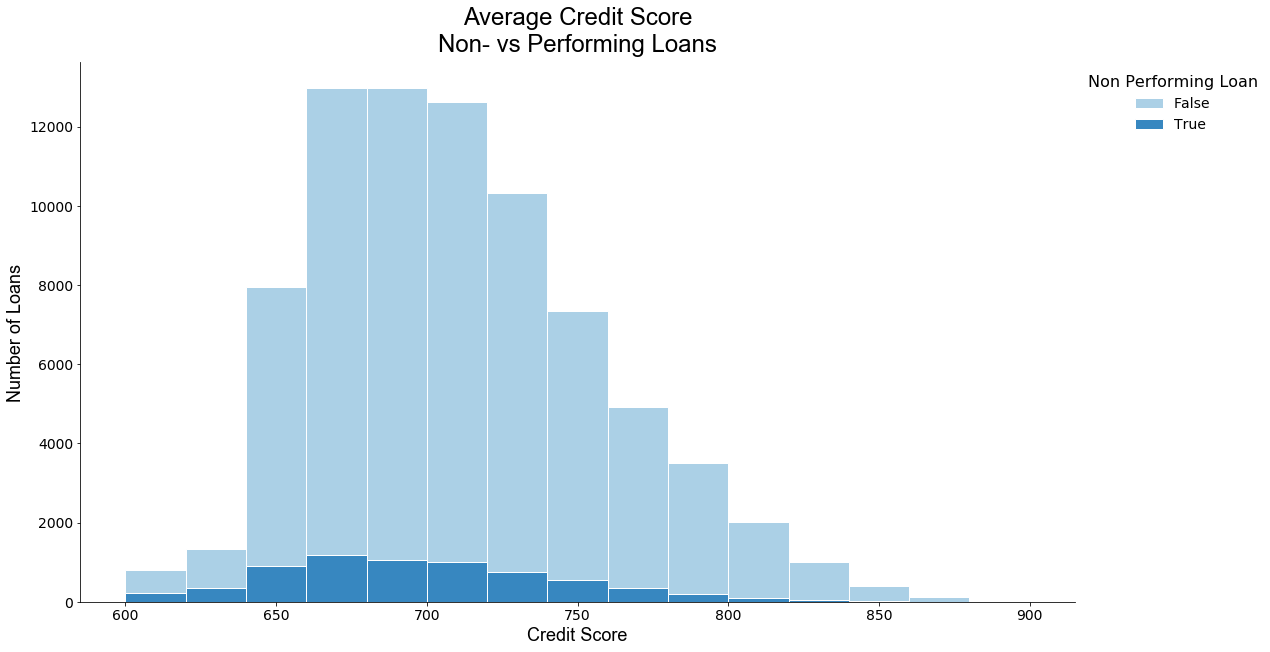

In [167]:
bin_edges = np.arange(600, loans_post2009['CreditScoreMean'].max()+20,20)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=8.27, aspect=(14.70/8.27), 
               palette=base_palette, legend_out=True)
g.map(plt.hist,'CreditScoreMean', bins=bin_edges, edgecolor='white')
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Credit Score', fontdict=axis_font_sb)
plt.ylabel('Number of Loans', fontdict=axis_font_sb)
plt.title('Average Credit Score\nNon- vs Performing Loans', fontdict=title_font_sb)
plt.legend(loc=2, bbox_to_anchor=(1,1), framealpha=0,title='Non Performing Loan', 
          title_fontsize=16, fontsize=14);

### How can we measure risk?

**Number of Credit Inquiries in the last 6 months** has traditionally been a risk predictor with a high amount of inquiries classifying the borrower as high risk, as this suggests credit applications have been declined by other lending institutions.

The proportion of non-performing loans is higher for borrowers who have 1 or more credit inquiries in the last 6 months.

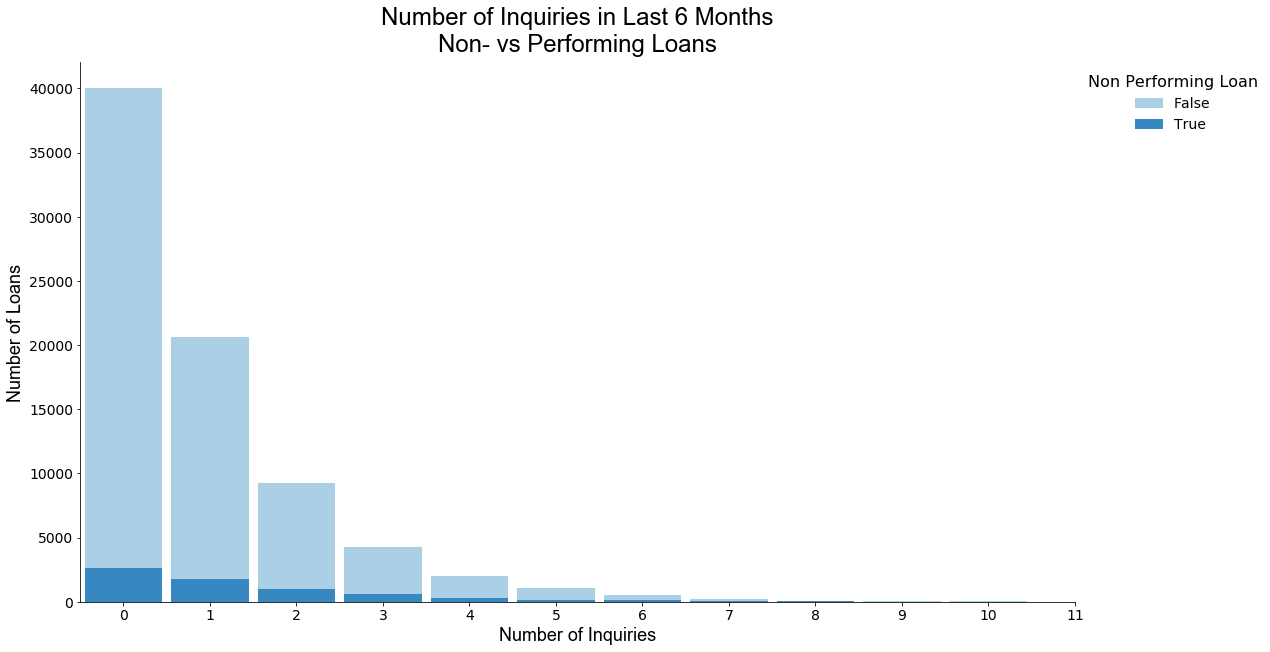

In [168]:
bin_edges=np.arange(-0.5, loans_post2009['InquiriesLast6Months'].max()+1,1)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=8.27, aspect=(14.70/8.27), 
               palette=base_palette, legend_out=True)
g.map(plt.hist,'InquiriesLast6Months', bins=bin_edges, rwidth=0.9 )
g.set(xlim=(-0.5, loans_post2009['InquiriesLast6Months'].describe([.999])['99.9%']),
      xticks=(np.arange(0,11+1,1)))
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Number of Inquiries', fontdict=axis_font_sb )
plt.ylabel('Number of Loans', fontdict=axis_font_sb)
plt.title('Number of Inquiries in Last 6 Months\nNon- vs Performing Loans', fontdict=title_font_sb)
plt.legend(loc=2, bbox_to_anchor=(1,1), framealpha=0,title='Non Performing Loan', 
          title_fontsize=16, fontsize=14);

### How can we measure risk?

**Debt-to-Income Ratio** is the percentage of gross income that goes into paying off monthly debt. A high ratio would suggest possible difficulties in paying off debts.

It appears the optimal debt-to-income ratio is about 20%. 

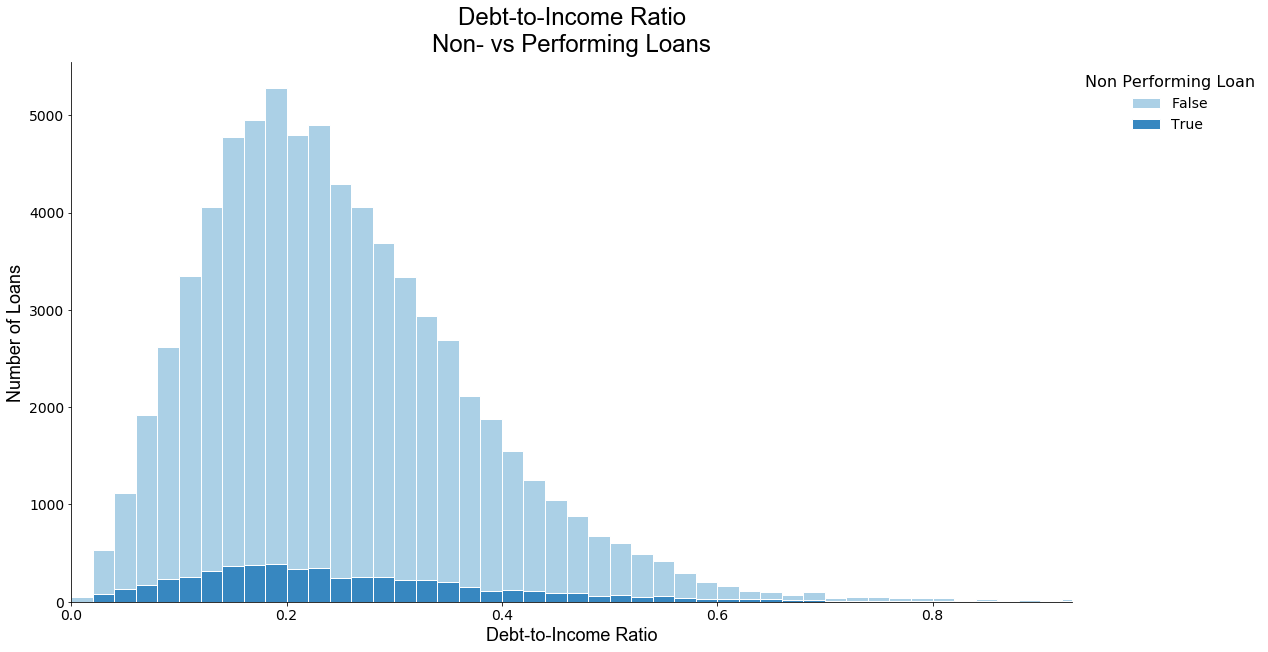

In [169]:
bin_edges = np.arange(0, loans_post2009['DebtToIncomeRatio'].max()+0.02, 0.02)
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=8.27, aspect=(14.70/8.27), 
               palette=base_palette, legend_out=True)
g.map(plt.hist,'DebtToIncomeRatio', bins=bin_edges, edgecolor='white')
g.set(xlim=(0,loans_post2009['DebtToIncomeRatio'].describe([0.995])['99.5%']))
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Debt-to-Income Ratio', fontdict=axis_font_sb)
plt.ylabel('Number of Loans', fontdict=axis_font_sb)
plt.title('Debt-to-Income Ratio\nNon- vs Performing Loans', fontdict=title_font_sb)
plt.legend(loc=2, bbox_to_anchor=(1,1), framealpha=0,title='Non Performing Loan', 
          title_fontsize=16, fontsize=14);

### How can we measure risk?

**Income Range** must also be taken into account to determine whether the underlying borrower has the means to repay the loan.  

As expected, the lower income range has a higher proportion of non-performing loans compared to the higher range.  

Higher income range of the borrower does not protect the investor from non-performing loans, as can be seen for the \\$75k+ income ranges showing noteworthy non-performing loan frequency.

It must also be noted that income is self-reported and not necessarily verified by Prosper.

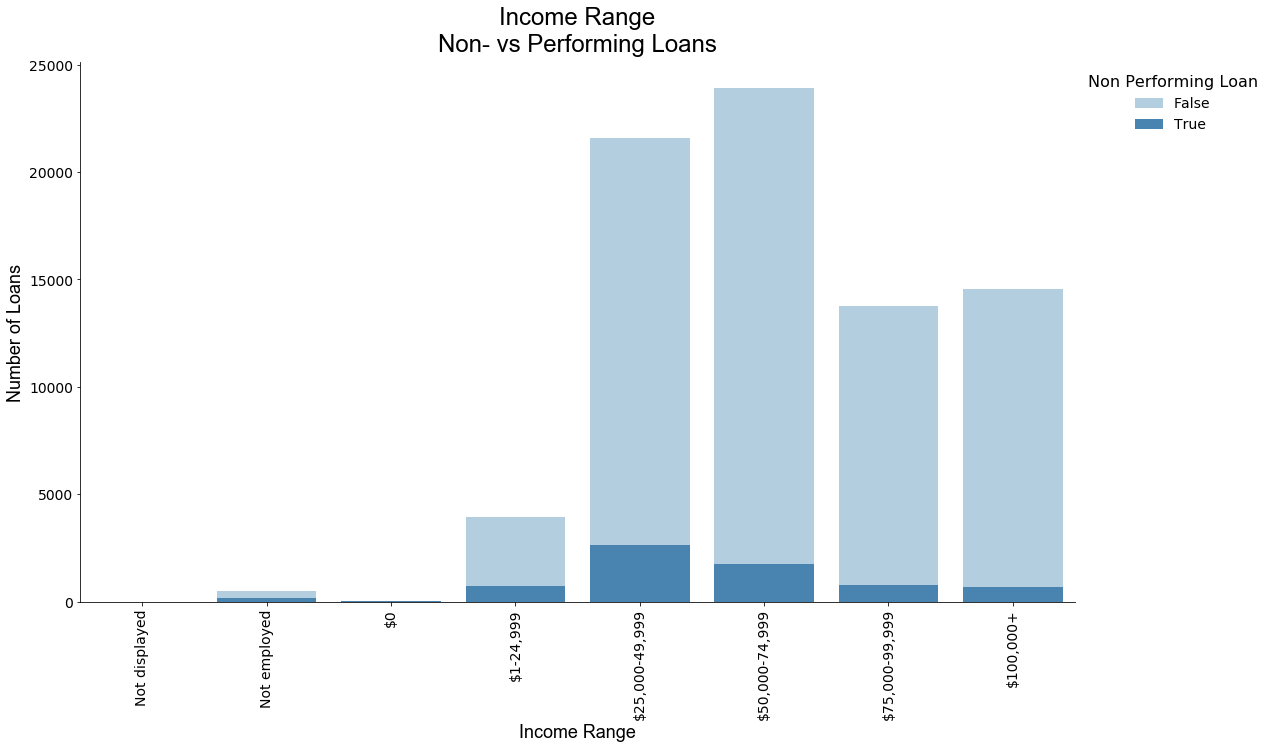

In [170]:
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan', height=8.27, aspect=(14.70/8.27), 
               palette=base_palette, legend_out=True)
g.map(sb.countplot,'IncomeRange', hue_order=[False,True], order=IncRange);
g.set_xticklabels(rotation=90)
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Income Range', fontdict=axis_font_sb)
plt.ylabel('Number of Loans', fontdict=axis_font_sb)
plt.title('Income Range\nNon- vs Performing Loans', fontdict=title_font_sb)
plt.legend(loc=2, bbox_to_anchor=(1,1), framealpha=0,title='Non Performing Loan', 
          title_fontsize=16, fontsize=14);

## One Risk Metric?

Prosper has taken some of the hard work out of assessing risk and has created a proprietary in-house rating system that takes into account these risk measures already mentioned.  

Although the weighting of each variable in determining Prosper Rating allocation cannot be confirmed, the Ratings can be useful as a jumping point for selecting or filtering out potential investment in Prosper Loans.

**Prosper Ratings** uses a Alpha-grade system AA to E plus HR for high risk.  An AA rating signifies low risk, C is mid risk and D,E and HR are considered High Risk.


### One Risk Metric?

**Prosper Ratings**

Most investment opportunities are in the mid-to-low risk C to A rated loans.  

The ratings correlate with the frequency of non-performing loans with a higher proportion of non-performing loans for the higher risk D to HR loans and a lower frequency and proportion for the mid to lower risk C to A loans.  

As can be seen, an AA lowest risk rating does not guarantee protection from non-performing loans

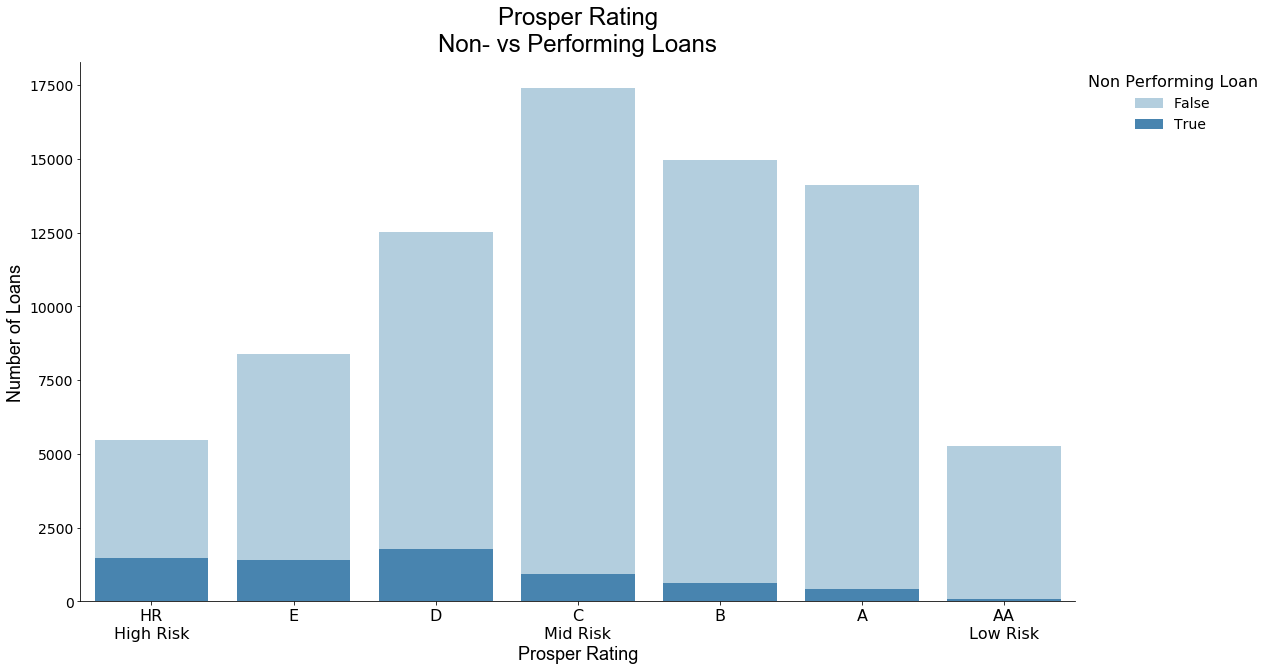

In [171]:
# Prosper Rating distribution
g=sb.FacetGrid(data=loans_post2009, hue='NonPerfLoan',height=8.27, aspect=(14.70/8.27), 
               palette=base_palette, legend_out=True)
g.map(sb.countplot,'ProsperRating (Alpha)', order=PRating)
g.ax.set_xticks(PRating_xlocs)
g.ax.set_xticklabels(PRating_Risk, minor=False, fontsize=16)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel('Prosper Rating', fontdict=axis_font_sb)
plt.ylabel('Number of Loans', fontdict=axis_font_sb)
plt.title('Prosper Rating\nNon- vs Performing Loans', fontdict=title_font_sb)
plt.legend(loc=2, bbox_to_anchor=(1,1), framealpha=0,title='Non Performing Loan', 
          title_fontsize=16, fontsize=14);

### One Risk Metric?

**Returns Compensate Risk**

Prosper Ratings when compared to returns shows the inherent risk associated with each rating.  Lower Risk  AA ratings are compensated with a lower median return as compared to higher risk D, E and HR ratings.  

Furthermore, across all Prosper Ratings except A, the median Lender Yield for non-performing loans was higher than the Lender Yield for performing loans, suggesting risk is being compensated with a higher return, even within each Prosper Rating groups.


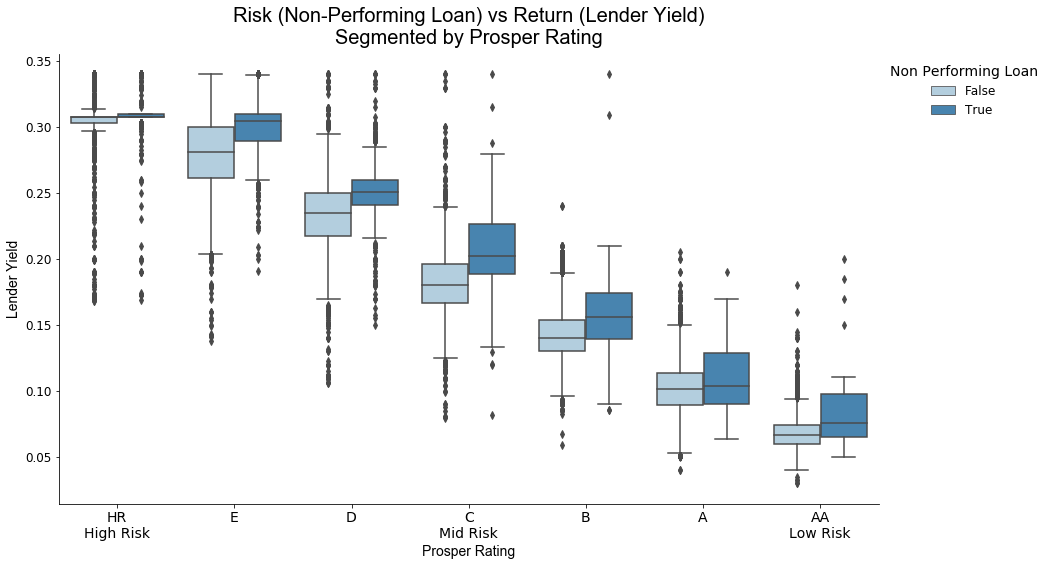

In [172]:
plt.figure(figsize=[14.70, 8.27])
ax=sb.boxplot(data=loans_post2009, x='ProsperRating (Alpha)', y='LenderYield', hue='NonPerfLoan',
           palette=base_palette)
ax.legend(loc=2, bbox_to_anchor=(1,1), framealpha=0,title='Non Performing Loan', 
          title_fontsize=14, fontsize=12)
ax.set_xticks(PRating_xlocs)
ax.set_xticklabels(PRating_Risk, minor=False, size=14)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield',fontdict=axis_font )
plt.tick_params(axis='y', labelsize=12)
plt.title('Risk (Non-Performing Loan) vs Return (Lender Yield)\nSegmented by Prosper Rating', fontdict=title_font)
sb.despine();

## Investment Strategy

With this information about risk and returns of Prosper Loan investing, an investment strategy can be outlined.  The two steps in selecting an investment are:

1. Determine Time Horizon
2. Determine Risk Tolerance


### Investment Strategy

**Step 1: Determine Time Horizon**

Prosper Loans are fixed term without a secondary market.  Time horizon selection should take into account when the investor would require the Principal investment back.  Another factor would be the tolerance of the investor of missing other potential investments during the fixed term of the loan.

By segmenting Loan Term by Prosper Rating and non-performing vs performing loans, a clearer picture of where the investment opportunites lies is made.

Prosper Ratings A and C have the highest frequency, and so most invesment opportunities, for 3 year long loans.  Furthermore 3 year loans for A and C ratings have the lowest ratio of non-performing to performing loans.

Across all ratings the 3 year loans are the most frequent.  5 year loans are less frequent for the higher risk D to HR ratings and non-existent for HR rating, which may be taking into account the idea that a longer term gives a larger window for a loan to possibly default.

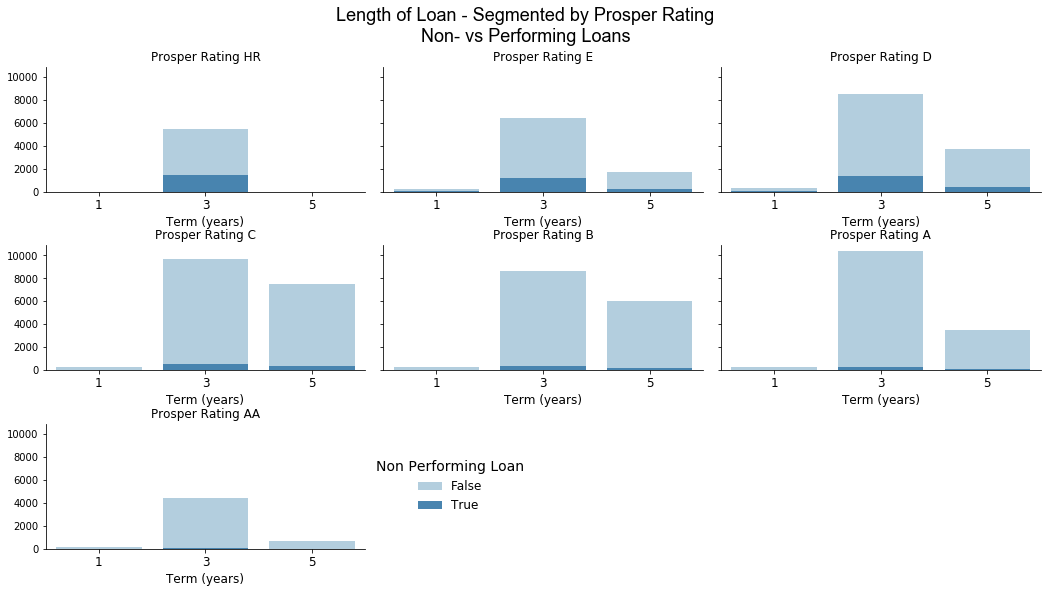

In [173]:
g=sb.FacetGrid(data=loans_post2009, col='ProsperRating (Alpha)',hue='NonPerfLoan',
               palette=base_palette,col_wrap=3, height=8.27/3, aspect=(14.70/3)/(8.27/3), legend_out=True)
g.map(sb.countplot,'Term', hue_order=[False,True], order=[12,36,60])

g.set(xlabel='Term (years)')
g.set_xticklabels(labels=['1','3','5'])

g.set_titles('Prosper Rating {col_name}', size=12)

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True, fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)

plt.subplots_adjust(top=0.88, hspace=0.43)
g.fig.suptitle('Length of Loan - Segmented by Prosper Rating\nNon- vs Performing Loans', fontdict=title_font_sb, 
               fontsize=18)
plt.legend(loc=6, bbox_to_anchor=(1,0.5), framealpha=0,title='Non Performing Loan', 
          title_fontsize=14, fontsize=12);

### Investment Strategy

**Step 2: Determine Risk Tolerance**

Risk tolerance can be defined as how much you can stand to lose.  This may not be the most optimistic way of approaching investing, but is probably the most realistic.

By dividing the sum of Net Principal Loss by the sum of Loan Amounts, aggregated over each Prosper Rating, an Average Loss on Loan can help with investment selection.

**Risk-Return Profile**

- Risk - the Average Loss on Loan
- Return - the Lender Yield

The investor can be thus be directed to an ideal investment using Prosper Rating and Yield based on the risk-return profile.  

Further consideration should be taken for the flagged dark blue Loss on Loan over 18c per dollar.  18% is the mean Lender Yield  

In [174]:
yield_bins = np.arange(loans_post2009['LenderYield'].min()-0.03,loans_post2009['LenderYield'].max()+0.05, 0.05)

#Aggregate Net Principal Loss summed up for each Prosper Rating and over 5% increments in Lender Yield
yield_rating=loans_post2009.groupby(by=[pd.cut(loans_post2009['LenderYield'], yield_bins),
                                        'ProsperRating (Alpha)']).sum()['LP_NetPrincipalLoss'].unstack()\
.sort_index(axis=0, ascending=False)

#Aggregate Loan Amount summed up for each Prosper Rating and over 5% increments in Lender Yield
yield_rating_amount=loans_post2009.groupby(by=[pd.cut(loans_post2009['LenderYield'], yield_bins),
                                               'ProsperRating (Alpha)']).sum()['LoanOriginalAmount'].unstack()\
.sort_index(axis=0, ascending=False)

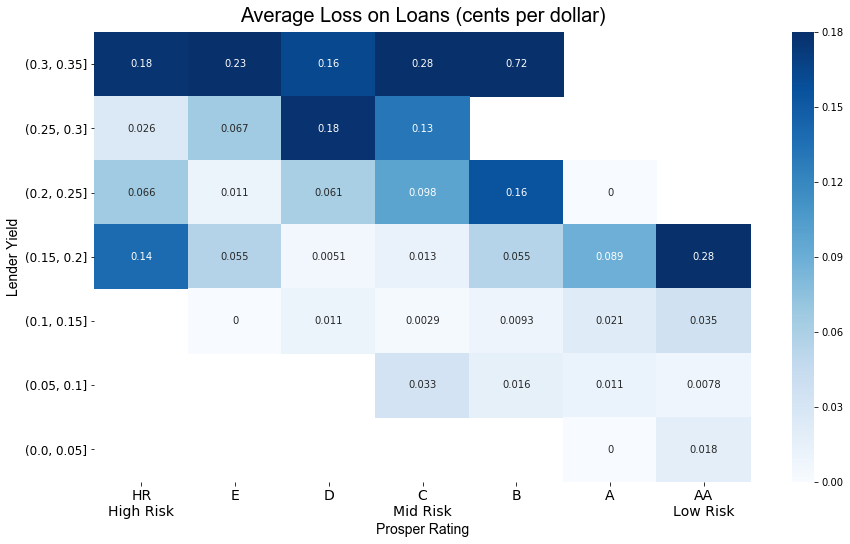

In [175]:
plt.figure(figsize=[14.70, 8.27])
ax=sb.heatmap(yield_rating/yield_rating_amount, cmap=base_palette,annot=True, vmax=0.18)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5])
ax.set_xticklabels(PRating_Risk, minor=False, size=14)
plt.title('Average Loss on Loans (cents per dollar)', fontdict=title_font)
plt.xlabel('Prosper Rating', fontdict=axis_font)
plt.ylabel('Lender Yield',fontdict=axis_font )
plt.tick_params(axis='y', labelsize=12, labelrotation=0);

## Final thoughts

Investing in Prosper Loans can be overwhelming.  It is also risky.  

This presentation explores the potential risks and returns in investing in Prosper Loans and outlines a broad investment strategy.  It is not and should not however be taken as financial advice.

The analysis does not take into account external economic factors, nor does it delve deeply into the interaction of the different risk metrics.

Importantly past performance is no guarantee of future results. 

